# Determining the sismic wave polarisation in the Vatnajokull ice
Realised in the frame of a master thesis\
Author : Julien Govoorts

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def closest(array, value) :
    idx = (np.abs(array - value)).argmin()
    print(array[idx])
    return idx

In [90]:
stt = '\SS_20781'

In [91]:
X = []
Y = list(range(0,190,10))

with open('D:\MEMOIRE\Geopsy_res\DATE_7_12\F_3_10_Hz'+stt+'.hv.grid') as file :
    readcsv = csv.reader(file, delimiter=' ')
    line = 0
    for row in readcsv :
        if line == 1 :
            X.append(float(row[0]))
        elif line > 1 and X[0] != float(row[0]) :
            x = float(row[0])
            X.append(x)
        elif line > 1 and X[0] == float(row[0]):
            break
        line += 1
    
#print(X)
#print(Y)
#idx = closest(np.array(X),F0[1])
#print(idx)
#MAXAMP = []
#for i in range(len(Y)) :
#    n = i+1
#    MAXAMP.append(AMP[idx*(n)])
#print(MAXAMP)

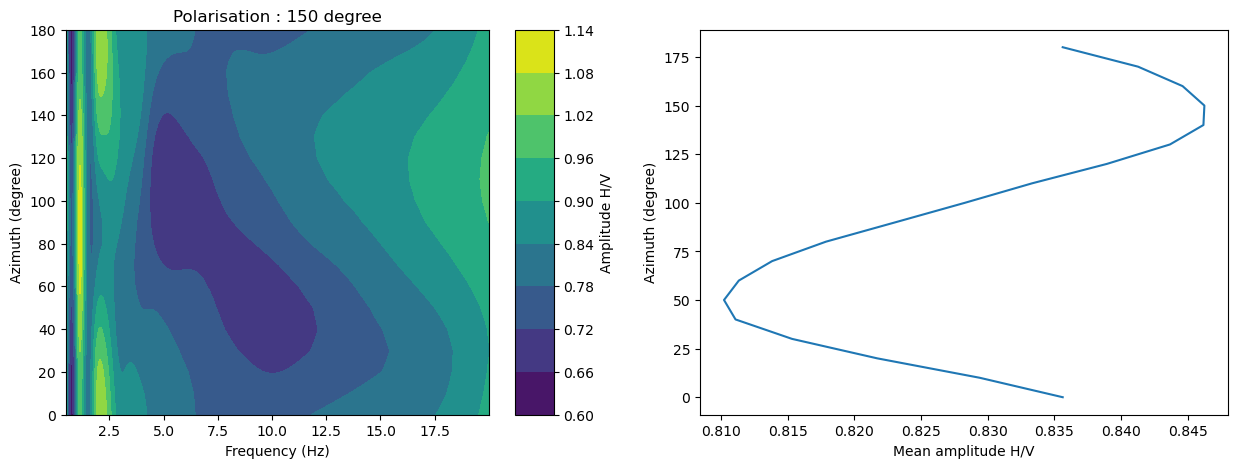

In [92]:
AMP3D = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

X3D = []
Y3D = []

with open('D:\MEMOIRE\Geopsy_res\DATE_7_12\F_3_10_Hz'+stt+'.hv.grid') as file :
    readcsv = csv.reader(file, delimiter=' ')
    line = 0
    n_amp = 0
    for row in readcsv :
        if line > 0 :
            if X[0] == float(row[0]) and line != 1 :
                n_amp += 1
            AMP3D[n_amp].append(float(row[2]))
        line += 1

for i in Y :
    X3D.append(X)
for i in Y :
    Ytemp = []
    for j in X :
        Ytemp.append(i)
    Y3D.append(Ytemp)

X3D = np.array(X3D)
Y3D = np.array(Y3D)
AMP3D = np.array(AMP3D)

mean = np.mean(AMP3D, axis = -1)
index_max = np.argmax(mean)

fig = plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(1,2,1)
#ax = plt.axes(projection ='3d')
#ax.plot_surface(X3D, Y3D, AMP3D,cmap='viridis', edgecolor='none')
surf = plt.contourf(X3D, Y3D, AMP3D)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Azimuth (degree)')
plt.title('Polarisation : ' +str(Y[index_max])+ ' degree'  )
plt.colorbar(surf, shrink=1, aspect=10, label = "Amplitude H/V")
plt.subplot(1,2,2)
plt.plot(mean, Y)
plt.ylabel('Azimuth (degree)')
plt.xlabel('Mean amplitude H/V')
plt.show()